In [1]:
from numpy import *
from PIL import Image
import pickle
from pylab import *
import os
from scipy.misc import *
from matplotlib.pyplot import *

In [4]:
path = 'sudoku_images/ocr_data/training/'
imlist = [os.path.join(path, f) for f in os.listdir(path) if f.endswith('.jpg')]

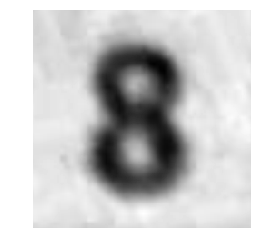

In [76]:
im = array(Image.open(imlist[3]))
im = imresize(im, (300, 300))
im = im[30:-30, 30:-30]
figure()
gray()
imshow(im)
axis('off')
show()

In [77]:
from scipy.ndimage import measurements, morphology

In [297]:
im = array(Image.open(imlist[33]).convert('L'))
im = imresize(im, (300, 300))
im = im[30:-30, 30:-30]
im = 1*(im<128)
im_open = morphology.binary_opening(im, ones((9, 9)), iterations=2)
im_open = 1*(im_open>0.5)

col = np.sum(im_open, axis=0)
row = np.sum(im_open, axis=1)
xmin = max(0, col.nonzero()[0][0]-10)
xmax = min(299, col.nonzero()[0][-1]+10)
ymin = max(0, row.nonzero()[0][0]-10)
ymax = min(299, row.nonzero()[0][-1]+10)

im_crop = im_open[ymin:ymax, xmin:xymax]
im_crop = imresize(im_crop, (24, 24))
im_crop = 1*(im_crop>128)

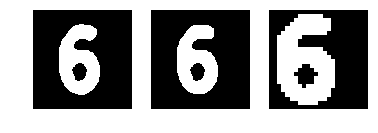

In [298]:
figure()
gray()
subplot(1, 3, 1)
imshow(im)
axis('off')
subplot(1, 3, 2)
imshow(im_open)
axis('off')
subplot(1, 3, 3)
imshow(im_crop)
axis('off')
show()

Use the metrics in http://www.maths.lth.se/matematiklth/personal/byrod/papers/sudokuocr.pdf

In [299]:
pixel_sum = sum(im_crop)
print pixel_sum
print im_crop.shape[0]*im_crop.shape[1]
print 1.0*pixel_sum/(im_crop.shape[0]*im_crop.shape[1])

212
576
0.368055555556


In [300]:
col_sum = np.sum(im_crop, axis=0)
row_sum = np.sum(im_crop, axis=1)
print col_sum
print row_sum

[ 0  0 12 15 17 19 19 16 13 14 15 18 18 16 13  7  0  0  0  0  0  0  0  0]
[ 0  6  9 10 11 11  6  5  5 11 12 13 14 12 10  8 10 10 12 12 11  9  5  0]


In [301]:
def count_alternative_lines(l, a):
    cnt = 0
    fp = l[0]-a
    for i in l[1:]:
        fc = i-a
        if (fp*fc)<0:
            cnt += 1
        if not fc==0:
            fp = fc
    return cnt

In [302]:
nbr_alt_cols = 1.0*count_alternative_lines(col_sum, len(row_sum)/2)/len(col_sum)
nbr_alt_rows = 1.0*count_alternative_lines(row_sum, len(col_sum)/2)/len(row_sum)

In [303]:
print nbr_alt_cols
print nbr_alt_rows

0.0833333333333
0.0833333333333


In [304]:
max_col_sum = max(col_sum)
max_row_sum = max(row_sum)

In [305]:
im_inv = 1-im_open
labels, nbr_of_objects = measurements.label(im_inv)
nbr_of_holes = nbr_of_objects-1

In [306]:
imm = im_crop

xx = sum([x*x*imm[y, x] for y in range(imm.shape[0]) for x in range(imm.shape[1])])
xx = 1.0*xx/sum([x*x for y in range(imm.shape[0]) for x in range(imm.shape[1])])

yy = sum([y*y*imm[y, x] for y in range(imm.shape[0]) for x in range(imm.shape[1])])
yy = 1.0*yy/sum([y*y for y in range(imm.shape[0]) for x in range(imm.shape[1])])

xy = sum([x*y*imm[y, x] for y in range(imm.shape[0]) for x in range(imm.shape[1])])
xy = 1.0*xy/sum([x*y for y in range(imm.shape[0]) for x in range(imm.shape[1])])

xxx = sum([x*x*x*imm[y, x] for y in range(imm.shape[0]) for x in range(imm.shape[1])])
xxx = 1.0*xxx/sum([x*x*x for y in range(imm.shape[0]) for x in range(imm.shape[1])])

yyy = sum([y*y*y*imm[y, x] for y in range(imm.shape[0]) for x in range(imm.shape[1])])
yyy = 1.0*yyy/sum([y*y*y for y in range(imm.shape[0]) for x in range(imm.shape[1])])

In [307]:
print xx, yy, xy, xxx, yyy

0.168256629664 0.359341273512 0.274325246797 0.106622055065 0.337642980291


In [326]:
def get_moments(imm):
    xx = sum([x*x*imm[y, x] for y in range(imm.shape[0]) for x in range(imm.shape[1])])
    xx = 1.0*xx/(sum([x*x for y in range(imm.shape[0]) for x in range(imm.shape[1])])+0.1)

    yy = sum([y*y*imm[y, x] for y in range(imm.shape[0]) for x in range(imm.shape[1])])
    yy = 1.0*yy/(sum([y*y for y in range(imm.shape[0]) for x in range(imm.shape[1])])+0.1)

    xy = sum([x*y*imm[y, x] for y in range(imm.shape[0]) for x in range(imm.shape[1])])
    xy = 1.0*xy/(sum([x*y for y in range(imm.shape[0]) for x in range(imm.shape[1])])+0.1)

    xxx = sum([x*x*x*imm[y, x] for y in range(imm.shape[0]) for x in range(imm.shape[1])])
    xxx = 1.0*xxx/(sum([x*x*x for y in range(imm.shape[0]) for x in range(imm.shape[1])])+0.1)

    yyy = sum([y*y*y*imm[y, x] for y in range(imm.shape[0]) for x in range(imm.shape[1])])
    yyy = 1.0*yyy/(sum([y*y*y for y in range(imm.shape[0]) for x in range(imm.shape[1])])+0.1)
    
    return (xx, yy, xy, xxx, yyy)

In [327]:
print get_moments(imm)

(0.16825646752961423, 0.35934092724625416, 0.27432488667705485, 0.10662204923346104, 0.33764296182289688)


In [328]:
xs = sum([imm[y, x]*imm[y, imm.shape[1]-x-1] for y in range(imm.shape[0]) for x in range(imm.shape[1])])
xs = 1.0*xs/sum([imm[y, x]**2 for y in range(imm.shape[0]) for x in range(imm.shape[1])])

ys = sum([imm[y, x]*imm[imm.shape[0]-y-1, x] for y in range(imm.shape[0]) for x in range(imm.shape[1])])
ys = 1.0*ys/sum([imm[y, x]**2 for y in range(imm.shape[0]) for x in range(imm.shape[1])])

In [329]:
print xs, ys

0.358490566038 0.830188679245


In [332]:
def get_symmetry(imm):
    xs = sum([imm[y, x]*imm[y, imm.shape[1]-x-1] for y in range(imm.shape[0]) for x in range(imm.shape[1])])
    xs = 1.0*xs/(sum([imm[y, x]**2 for y in range(imm.shape[0]) for x in range(imm.shape[1])])+0.1)

    ys = sum([imm[y, x]*imm[imm.shape[0]-y-1, x] for y in range(imm.shape[0]) for x in range(imm.shape[1])])
    ys = 1.0*ys/(sum([imm[y, x]**2 for y in range(imm.shape[0]) for x in range(imm.shape[1])])+0.1)
    return (xs, ys)

In [333]:
print get_symmetry(imm)

(0.35832154644035835, 0.82979726544082977)


In [334]:
def compute_feature(im):
    """ Returns a feature vector for an
    ocr image patch. """
    
    im = imresize(im, (300, 300))
    im = im[30:-30, 30:-30]
    im = 1*(im<128)
    im_open = morphology.binary_opening(im, ones((9, 9)), iterations=2)
    im_open = 1*(im_open>0.5)
    
    col = np.sum(im_open, axis=0)
    row = np.sum(im_open, axis=1)
    try:
        xmin = max(0, col.nonzero()[0][0]-10)
        xmax = min(299, col.nonzero()[0][-1]+10)
        ymin = max(0, row.nonzero()[0][0]-10)
        ymax = min(299, row.nonzero()[0][-1]+10)
    except:
        xmin = 0
        xmax = 299
        ymin = 0
        ymax = 299

    im_crop = im_open[ymin:ymax, xmin:xymax]
    im_crop = imresize(im_crop, (24, 24))
    im_crop = 1*(im_crop>128)

    black_proportion = 1.0*sum(im_crop)/(im_crop.shape[0]*im_crop.shape[1])

    col_sum = np.sum(im_crop, axis=0)
    row_sum = np.sum(im_crop, axis=1)

    max_col_sum = 1.0*max(col_sum)/im_crop.shape[0]
    max_row_sum = 1.0*max(row_sum)/im_crop.shape[1]

    nbr_alt_cols = 1.0*count_alternative_lines(col_sum, len(row_sum)/2)/len(col_sum)
    nbr_alt_rows = 1.0*count_alternative_lines(row_sum, len(col_sum)/2)/len(row_sum)
    
    labels, nbr_of_objects = measurements.label(1-im_crop)
    nbr_of_holes = nbr_of_objects-1

    moments = get_moments(im_crop)
    
    symmetry = get_symmetry(im_crop)
    
    return [black_proportion, max_col_sum, max_row_sum, nbr_alt_cols, nbr_alt_rows,
           nbr_of_holes, moments[0], moments[1], moments[2], moments[3], moments[4],
           symmetry[0], symmetry[1]]

In [346]:
compute_feature(array(Image.open(imlist[6]).convert('L')))

[0.3802083333333333,
 0.8333333333333334,
 0.625,
 0.08333333333333333,
 0.16666666666666666,
 1,
 0.20482558122727679,
 0.34412547783160091,
 0.29507942779953289,
 0.13905625683415943,
 0.32079655880261065,
 0.40164308534915566,
 0.83067092651757191]

In [336]:
def load_ocr_data(path):
    """ Return labels and ocr features for all images in path. """
    
    # create list of all files ending in .jpg
    imlist = [os.path.join(path, f) for f in os.listdir(path) if f.endswith('.jpg')]
    
    labels = [int(imfile.split('/')[-1][0]) for imfile in imlist]
    features = []
    for imname in imlist:
        print imname
        im = array(Image.open(imname).convert('L'))
        features.append(compute_feature(im))
    return array(features), labels

In [337]:
features, labels = load_ocr_data('sudoku_images/ocr_data/training/')
test_features, test_labels = load_ocr_data('sudoku_images/ocr_data/testing/')

sudoku_images/ocr_data/training/5_126.jpg
sudoku_images/ocr_data/training/3_21.jpg
sudoku_images/ocr_data/training/3_249.jpg
sudoku_images/ocr_data/training/8_116.jpg
sudoku_images/ocr_data/training/5_54.jpg
sudoku_images/ocr_data/training/7_246.jpg
sudoku_images/ocr_data/training/9_302.jpg
sudoku_images/ocr_data/training/6_160.jpg
sudoku_images/ocr_data/training/0_68.jpg
sudoku_images/ocr_data/training/4_92.jpg
sudoku_images/ocr_data/training/1_206.jpg
sudoku_images/ocr_data/training/7_76.jpg
sudoku_images/ocr_data/training/2_88.jpg
sudoku_images/ocr_data/training/2_90.jpg
sudoku_images/ocr_data/training/8_155.jpg
sudoku_images/ocr_data/training/9_253.jpg
sudoku_images/ocr_data/training/7_151.jpg
sudoku_images/ocr_data/training/1_122.jpg
sudoku_images/ocr_data/training/1_125.jpg
sudoku_images/ocr_data/training/8_78.jpg
sudoku_images/ocr_data/training/9_179.jpg
sudoku_images/ocr_data/training/4_100.jpg
sudoku_images/ocr_data/training/5_93.jpg
sudoku_images/ocr_data/training/3_166.jpg
s

sudoku_images/ocr_data/training/2_236.jpg
sudoku_images/ocr_data/training/3_212.jpg
sudoku_images/ocr_data/training/5_85.jpg
sudoku_images/ocr_data/training/3_39.jpg
sudoku_images/ocr_data/training/4_205.jpg
sudoku_images/ocr_data/training/6_28.jpg
sudoku_images/ocr_data/training/7_24.jpg
sudoku_images/ocr_data/training/8_64.jpg
sudoku_images/ocr_data/training/0_84.jpg
sudoku_images/ocr_data/training/8_191.jpg
sudoku_images/ocr_data/training/4_118.jpg
sudoku_images/ocr_data/training/2_159.jpg
sudoku_images/ocr_data/training/7_189.jpg
sudoku_images/ocr_data/training/2_46.jpg
sudoku_images/ocr_data/training/6_115.jpg
sudoku_images/ocr_data/training/7_250.jpg
sudoku_images/ocr_data/training/8_4.jpg
sudoku_images/ocr_data/training/8_261.jpg
sudoku_images/ocr_data/training/6_65.jpg
sudoku_images/ocr_data/training/1_42.jpg
sudoku_images/ocr_data/training/6_212.jpg
sudoku_images/ocr_data/training/6_257.jpg
sudoku_images/ocr_data/training/9_155.jpg
sudoku_images/ocr_data/training/1_155.jpg
sud

sudoku_images/ocr_data/training/2_257.jpg
sudoku_images/ocr_data/training/0_12.jpg
sudoku_images/ocr_data/training/2_109.jpg
sudoku_images/ocr_data/training/7_134.jpg
sudoku_images/ocr_data/training/8_61.jpg
sudoku_images/ocr_data/training/9_140.jpg
sudoku_images/ocr_data/training/3_210.jpg
sudoku_images/ocr_data/training/6_206.jpg
sudoku_images/ocr_data/training/9_76.jpg
sudoku_images/ocr_data/training/5_138.jpg
sudoku_images/ocr_data/training/2_185.jpg
sudoku_images/ocr_data/training/1_136.jpg
sudoku_images/ocr_data/training/6_204.jpg
sudoku_images/ocr_data/training/1_25.jpg
sudoku_images/ocr_data/training/9_39.jpg
sudoku_images/ocr_data/training/0_50.jpg
sudoku_images/ocr_data/training/3_83.jpg
sudoku_images/ocr_data/training/1_262.jpg
sudoku_images/ocr_data/training/2_59.jpg
sudoku_images/ocr_data/training/1_263.jpg
sudoku_images/ocr_data/training/0_89.jpg
sudoku_images/ocr_data/training/2_168.jpg
sudoku_images/ocr_data/training/8_262.jpg
sudoku_images/ocr_data/training/4_130.jpg
s

sudoku_images/ocr_data/training/5_2.jpg
sudoku_images/ocr_data/training/7_230.jpg
sudoku_images/ocr_data/training/9_294.jpg
sudoku_images/ocr_data/training/1_120.jpg
sudoku_images/ocr_data/training/6_14.jpg
sudoku_images/ocr_data/training/7_103.jpg
sudoku_images/ocr_data/training/3_120.jpg
sudoku_images/ocr_data/training/1_170.jpg
sudoku_images/ocr_data/training/4_251.jpg
sudoku_images/ocr_data/training/5_174.jpg
sudoku_images/ocr_data/training/9_223.jpg
sudoku_images/ocr_data/training/8_46.jpg
sudoku_images/ocr_data/training/4_18.jpg
sudoku_images/ocr_data/training/6_208.jpg
sudoku_images/ocr_data/training/1_234.jpg
sudoku_images/ocr_data/training/3_35.jpg
sudoku_images/ocr_data/training/4_249.jpg
sudoku_images/ocr_data/training/9_202.jpg
sudoku_images/ocr_data/training/0_120.jpg
sudoku_images/ocr_data/training/3_32.jpg
sudoku_images/ocr_data/training/4_183.jpg
sudoku_images/ocr_data/training/1_8.jpg
sudoku_images/ocr_data/training/8_45.jpg
sudoku_images/ocr_data/training/9_180.jpg
su

sudoku_images/ocr_data/training/7_95.jpg
sudoku_images/ocr_data/training/2_180.jpg
sudoku_images/ocr_data/training/3_193.jpg
sudoku_images/ocr_data/training/8_179.jpg
sudoku_images/ocr_data/training/4_177.jpg
sudoku_images/ocr_data/training/9_32.jpg
sudoku_images/ocr_data/training/0_7.jpg
sudoku_images/ocr_data/training/6_94.jpg
sudoku_images/ocr_data/training/4_106.jpg
sudoku_images/ocr_data/training/2_51.jpg
sudoku_images/ocr_data/training/8_182.jpg
sudoku_images/ocr_data/training/5_182.jpg
sudoku_images/ocr_data/training/5_248.jpg
sudoku_images/ocr_data/training/6_246.jpg
sudoku_images/ocr_data/training/2_101.jpg
sudoku_images/ocr_data/training/0_11.jpg
sudoku_images/ocr_data/training/9_37.jpg
sudoku_images/ocr_data/training/6_104.jpg
sudoku_images/ocr_data/training/5_87.jpg
sudoku_images/ocr_data/training/0_119.jpg
sudoku_images/ocr_data/training/6_114.jpg
sudoku_images/ocr_data/training/2_197.jpg
sudoku_images/ocr_data/training/4_245.jpg
sudoku_images/ocr_data/training/9_227.jpg
s

sudoku_images/ocr_data/training/5_22.jpg
sudoku_images/ocr_data/training/3_22.jpg
sudoku_images/ocr_data/training/4_3.jpg
sudoku_images/ocr_data/training/5_147.jpg
sudoku_images/ocr_data/training/7_100.jpg
sudoku_images/ocr_data/training/5_172.jpg
sudoku_images/ocr_data/training/0_40.jpg
sudoku_images/ocr_data/training/9_177.jpg
sudoku_images/ocr_data/training/4_101.jpg
sudoku_images/ocr_data/training/0_33.jpg
sudoku_images/ocr_data/training/1_188.jpg
sudoku_images/ocr_data/training/2_171.jpg
sudoku_images/ocr_data/training/3_151.jpg
sudoku_images/ocr_data/training/2_43.jpg
sudoku_images/ocr_data/training/3_97.jpg
sudoku_images/ocr_data/training/2_52.jpg
sudoku_images/ocr_data/training/6_175.jpg
sudoku_images/ocr_data/training/9_237.jpg
sudoku_images/ocr_data/training/3_256.jpg
sudoku_images/ocr_data/training/8_86.jpg
sudoku_images/ocr_data/training/8_141.jpg
sudoku_images/ocr_data/training/9_40.jpg
sudoku_images/ocr_data/training/1_196.jpg
sudoku_images/ocr_data/training/8_16.jpg
sudo

sudoku_images/ocr_data/training/5_137.jpg
sudoku_images/ocr_data/training/7_245.jpg
sudoku_images/ocr_data/training/6_137.jpg
sudoku_images/ocr_data/training/2_218.jpg
sudoku_images/ocr_data/training/4_80.jpg
sudoku_images/ocr_data/training/0_60.jpg
sudoku_images/ocr_data/training/6_122.jpg
sudoku_images/ocr_data/training/4_199.jpg
sudoku_images/ocr_data/training/0_114.jpg
sudoku_images/ocr_data/training/5_143.jpg
sudoku_images/ocr_data/training/9_264.jpg
sudoku_images/ocr_data/training/9_24.jpg
sudoku_images/ocr_data/training/3_93.jpg
sudoku_images/ocr_data/training/7_213.jpg
sudoku_images/ocr_data/training/5_192.jpg
sudoku_images/ocr_data/training/8_88.jpg
sudoku_images/ocr_data/training/2_58.jpg
sudoku_images/ocr_data/training/4_117.jpg
sudoku_images/ocr_data/training/3_108.jpg
sudoku_images/ocr_data/training/5_247.jpg
sudoku_images/ocr_data/training/8_75.jpg
sudoku_images/ocr_data/training/4_153.jpg
sudoku_images/ocr_data/training/1_203.jpg
sudoku_images/ocr_data/training/2_230.jpg

sudoku_images/ocr_data/testing/3_218.jpg
sudoku_images/ocr_data/testing/2_44.jpg
sudoku_images/ocr_data/testing/9_201.jpg
sudoku_images/ocr_data/testing/9_245.jpg
sudoku_images/ocr_data/testing/9_131.jpg
sudoku_images/ocr_data/testing/7_166.jpg
sudoku_images/ocr_data/testing/2_45.jpg
sudoku_images/ocr_data/testing/1_157.jpg
sudoku_images/ocr_data/testing/4_192.jpg
sudoku_images/ocr_data/testing/9_93.jpg
sudoku_images/ocr_data/testing/9_79.jpg
sudoku_images/ocr_data/testing/6_162.jpg
sudoku_images/ocr_data/testing/2_18.jpg
sudoku_images/ocr_data/testing/3_196.jpg
sudoku_images/ocr_data/testing/3_259.jpg
sudoku_images/ocr_data/testing/2_126.jpg
sudoku_images/ocr_data/testing/1_33.jpg
sudoku_images/ocr_data/testing/6_236.jpg
sudoku_images/ocr_data/testing/7_247.jpg
sudoku_images/ocr_data/testing/5_60.jpg
sudoku_images/ocr_data/testing/1_114.jpg
sudoku_images/ocr_data/testing/5_19.jpg
sudoku_images/ocr_data/testing/3_27.jpg
sudoku_images/ocr_data/testing/3_56.jpg
sudoku_images/ocr_data/tes

sudoku_images/ocr_data/testing/2_94.jpg
sudoku_images/ocr_data/testing/9_159.jpg
sudoku_images/ocr_data/testing/6_81.jpg
sudoku_images/ocr_data/testing/6_198.jpg
sudoku_images/ocr_data/testing/3_131.jpg
sudoku_images/ocr_data/testing/3_34.jpg
sudoku_images/ocr_data/testing/8_235.jpg
sudoku_images/ocr_data/testing/1_242.jpg
sudoku_images/ocr_data/testing/6_230.jpg
sudoku_images/ocr_data/testing/8_186.jpg
sudoku_images/ocr_data/testing/4_24.jpg
sudoku_images/ocr_data/testing/4_216.jpg
sudoku_images/ocr_data/testing/7_89.jpg
sudoku_images/ocr_data/testing/7_204.jpg
sudoku_images/ocr_data/testing/6_64.jpg
sudoku_images/ocr_data/testing/6_73.jpg
sudoku_images/ocr_data/testing/7_205.jpg
sudoku_images/ocr_data/testing/4_148.jpg
sudoku_images/ocr_data/testing/2_263.jpg
sudoku_images/ocr_data/testing/6_72.jpg
sudoku_images/ocr_data/testing/3_9.jpg
sudoku_images/ocr_data/testing/4_58.jpg
sudoku_images/ocr_data/testing/8_285.jpg
sudoku_images/ocr_data/testing/3_71.jpg
sudoku_images/ocr_data/testi

sudoku_images/ocr_data/testing/7_52.jpg
sudoku_images/ocr_data/testing/2_99.jpg
sudoku_images/ocr_data/testing/5_25.jpg
sudoku_images/ocr_data/testing/2_260.jpg
sudoku_images/ocr_data/testing/9_176.jpg
sudoku_images/ocr_data/testing/2_10.jpg
sudoku_images/ocr_data/testing/5_91.jpg
sudoku_images/ocr_data/testing/1_15.jpg
sudoku_images/ocr_data/testing/8_95.jpg
sudoku_images/ocr_data/testing/7_84.jpg
sudoku_images/ocr_data/testing/1_46.jpg
sudoku_images/ocr_data/testing/1_16.jpg
sudoku_images/ocr_data/testing/9_110.jpg
sudoku_images/ocr_data/testing/4_30.jpg
sudoku_images/ocr_data/testing/6_196.jpg
sudoku_images/ocr_data/testing/9_209.jpg
sudoku_images/ocr_data/testing/2_132.jpg
sudoku_images/ocr_data/testing/4_173.jpg
sudoku_images/ocr_data/testing/9_215.jpg
sudoku_images/ocr_data/testing/4_253.jpg
sudoku_images/ocr_data/testing/7_46.jpg
sudoku_images/ocr_data/testing/7_113.jpg
sudoku_images/ocr_data/testing/6_47.jpg
sudoku_images/ocr_data/testing/8_202.jpg
sudoku_images/ocr_data/testin

sudoku_images/ocr_data/testing/9_256.jpg
sudoku_images/ocr_data/testing/9_258.jpg
sudoku_images/ocr_data/testing/4_236.jpg
sudoku_images/ocr_data/testing/2_6.jpg
sudoku_images/ocr_data/testing/2_201.jpg
sudoku_images/ocr_data/testing/7_138.jpg
sudoku_images/ocr_data/testing/4_184.jpg
sudoku_images/ocr_data/testing/5_215.jpg
sudoku_images/ocr_data/testing/8_263.jpg
sudoku_images/ocr_data/testing/4_170.jpg
sudoku_images/ocr_data/testing/2_3.jpg
sudoku_images/ocr_data/testing/3_118.jpg
sudoku_images/ocr_data/testing/4_82.jpg
sudoku_images/ocr_data/testing/5_127.jpg
sudoku_images/ocr_data/testing/4_235.jpg
sudoku_images/ocr_data/testing/2_49.jpg
sudoku_images/ocr_data/testing/6_130.jpg
sudoku_images/ocr_data/testing/9_115.jpg
sudoku_images/ocr_data/testing/7_258.jpg
sudoku_images/ocr_data/testing/5_59.jpg
sudoku_images/ocr_data/testing/6_237.jpg
sudoku_images/ocr_data/testing/5_16.jpg
sudoku_images/ocr_data/testing/7_256.jpg
sudoku_images/ocr_data/testing/8_242.jpg
sudoku_images/ocr_data/t

sudoku_images/ocr_data/testing/9_281.jpg
sudoku_images/ocr_data/testing/2_97.jpg
sudoku_images/ocr_data/testing/7_240.jpg
sudoku_images/ocr_data/testing/3_188.jpg
sudoku_images/ocr_data/testing/6_44.jpg
sudoku_images/ocr_data/testing/6_98.jpg
sudoku_images/ocr_data/testing/9_199.jpg
sudoku_images/ocr_data/testing/4_55.jpg
sudoku_images/ocr_data/testing/1_189.jpg
sudoku_images/ocr_data/testing/7_156.jpg
sudoku_images/ocr_data/testing/8_278.jpg
sudoku_images/ocr_data/testing/1_233.jpg
sudoku_images/ocr_data/testing/7_214.jpg
sudoku_images/ocr_data/testing/4_2.jpg
sudoku_images/ocr_data/testing/4_233.jpg
sudoku_images/ocr_data/testing/4_72.jpg
sudoku_images/ocr_data/testing/9_257.jpg
sudoku_images/ocr_data/testing/8_18.jpg
sudoku_images/ocr_data/testing/8_85.jpg
sudoku_images/ocr_data/testing/1_199.jpg
sudoku_images/ocr_data/testing/5_205.jpg
sudoku_images/ocr_data/testing/1_250.jpg
sudoku_images/ocr_data/testing/4_128.jpg
sudoku_images/ocr_data/testing/8_236.jpg
sudoku_images/ocr_data/te

In [338]:
features = map(list, features)
test_features = map(list, test_features)

In [342]:
from svmutil import *

In [343]:
prob = svm_problem(labels, features)
param = svm_parameter('-t 0')
m = svm_train(prob, param)

In [344]:
res = svm_predict(labels, features, m)

Accuracy = 81.0504% (1142/1409) (classification)


In [345]:
res = svm_predict(test_labels, test_features, m)

Accuracy = 77.7332% (775/997) (classification)


Not bad for just 10 metrices